In [3]:
from pymongo import MongoClient

In [4]:
db = MongoClient().python_test

In [5]:
db.fs.files.find()  # 불러오는 함수에서 보이지 않는다면, 밑에처럼 list를 씌어주기

In [6]:
list(db.fs.files.find())

[{'_id': ObjectId('6090add7f62e05caa5237263'),
  'filename': 'jpg',
  'metadata': {'ContentType': 'image/jpg', 'Type': 'Cat'},
  'chunkSize': 261120,
  'md5': 'd41d8cd98f00b204e9800998ecf8427e',
  'length': 0,
  'uploadDate': datetime.datetime(2021, 5, 4, 2, 13, 46, 482000)},
 {'_id': ObjectId('6090addef62e05caa5237264'),
  'filename': 'IqkSf-vO_Jl1hA9k2SPeu3puo2R4.jpg',
  'metadata': {'ContentType': 'image/jpg', 'type': 'cat'},
  'chunkSize': 261120,
  'md5': '7119e67bf6b132668f1965e0d964b752',
  'length': 58564,
  'uploadDate': datetime.datetime(2021, 5, 4, 2, 13, 50, 899000)},
 {'_id': ObjectId('6090addef62e05caa5237266'),
  'filename': 'I5moydFuUMwFi3oEOPX959RlIZqY.jpg',
  'metadata': {'ContentType': 'image/jpg', 'type': 'cat'},
  'chunkSize': 261120,
  'md5': '4a7afd67b9e07465a226f4194f96446c',
  'length': 73356,
  'uploadDate': datetime.datetime(2021, 5, 4, 2, 13, 50, 968000)},
 {'_id': ObjectId('6090ade4f62e05caa5237268'),
  'filename': 'IzCIPzMQrpQjeSKZWsg22yB_-IIo.jpg',
  'met

In [7]:
#파일 내용들을 이미지화 하기 위해 우선 리스트형 변수에 담아준다. 

image_list = list(db.fs.files.find())

In [ ]:
# 각각 저장된 이미지의 파일크기가 다르면 머신러닝을 돌릴 수 없음.
# 그래서 가로세로의 길이를 맞추어주는 단계가 필요함.

In [8]:
IM_WIDTH =200
IM_HEIGHT = 200

In [ ]:
image = []
labels=[]

In [9]:
import numpy as np

In [10]:
file_detail =image_list[2]

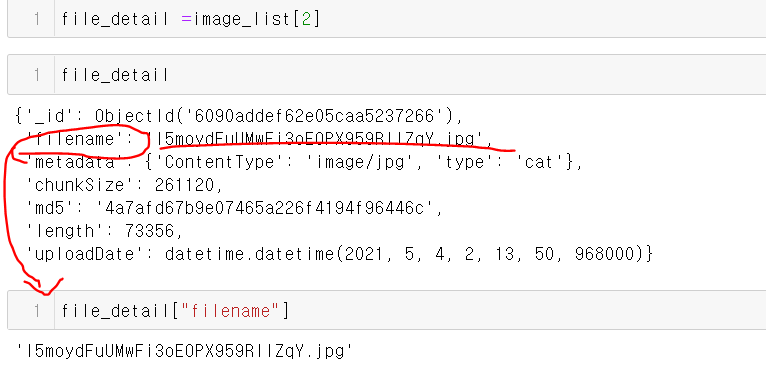

In [15]:
file_detail["filename"]

'I5moydFuUMwFi3oEOPX959RlIZqY.jpg'

In [16]:
from gridfs import GridFS   
# 위는 파일정보이며, chunk에서 부터 이미지를 불러와야한다. 

In [17]:
fs = GridFS(db)

In [18]:
f= fs.get_last_version(filename=file_detail["filename"])

In [19]:
f

In [20]:
data = f.read()

In [21]:
data

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xdb\x00C\x01\x03\x04\x04\x05\x04\x05\t\x05\x05\t\x14\r\x0b\r\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\xff\xc0\x00\x11\x08\x01\xe3\x02\xd4\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1

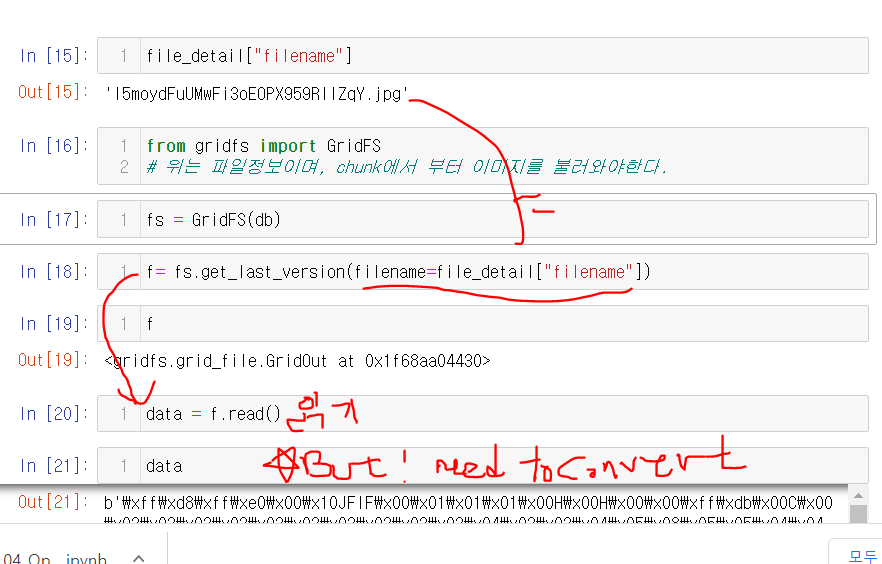

In [22]:
# Convert 하기위해서 필요한 라이브러리 임포트하기. 
from PIL import Image    
from io import BytesIO

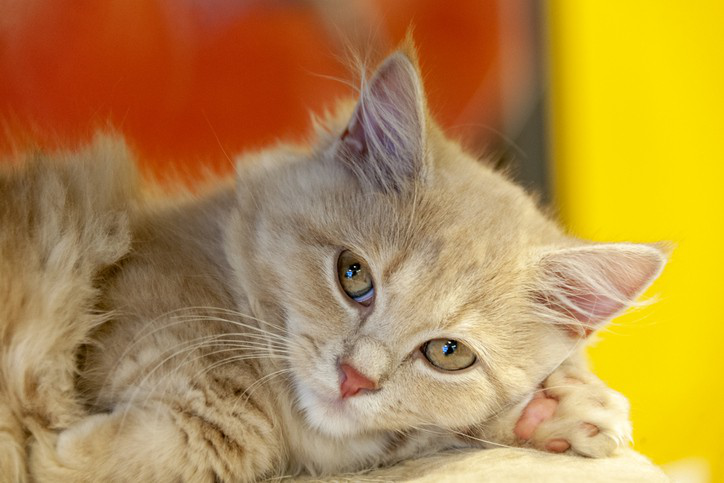

In [24]:
Image.open(BytesIO(data))    # Data의 숫자, 글자로 된 정보를 이미지화 하기 

In [50]:
im=Image.open(BytesIO(data)) #머신러닝을 위해서 변수에 담아서 사용하기

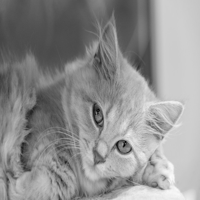

In [52]:
im= im.convert("L")   # 흑백사진으로 전환하기
im=im.resize((200, 200)) # 사이즈 크기 변경 = shape
im

In [53]:
#이미지에는 숫자가 저장되어있는데, 검정색 일수록 200 이상, 흰색 일수록 0 가까이로 나타난다.
# 우선 쉽개 구분하려고 색말고 흑백으로 변경한거임.

In [54]:
import numpy as np

In [55]:
np.array(im)  # 위의 이미지의 픽셀하나하나의 값을 나열

array([[105, 104, 107, ..., 198, 197, 197],
       [103, 104, 107, ..., 198, 197, 197],
       [105, 103, 105, ..., 198, 197, 197],
       ...,
       [147, 150, 144, ..., 187, 185, 186],
       [147, 155, 144, ..., 187, 186, 186],
       [146, 153, 145, ..., 186, 186, 185]], dtype=uint8)

머신러닝은 0~1 사이의 실수를 좋아함. 따라서 픽셀의 최소 0 최대 255를 기쥰으로
/ 255 (나누기) 를하면 0 ~ 1 사이의 숫자로 변환이 된다. 

In [56]:
im=(np.array(im)/255)
im

array([[0.41176471, 0.40784314, 0.41960784, ..., 0.77647059, 0.77254902,
        0.77254902],
       [0.40392157, 0.40784314, 0.41960784, ..., 0.77647059, 0.77254902,
        0.77254902],
       [0.41176471, 0.40392157, 0.41176471, ..., 0.77647059, 0.77254902,
        0.77254902],
       ...,
       [0.57647059, 0.58823529, 0.56470588, ..., 0.73333333, 0.7254902 ,
        0.72941176],
       [0.57647059, 0.60784314, 0.56470588, ..., 0.73333333, 0.72941176,
        0.72941176],
       [0.57254902, 0.6       , 0.56862745, ..., 0.72941176, 0.72941176,
        0.7254902 ]])

 Surport Vector machine  을 사용하려면 reshape 으로 1줄 로 변경해야한다.

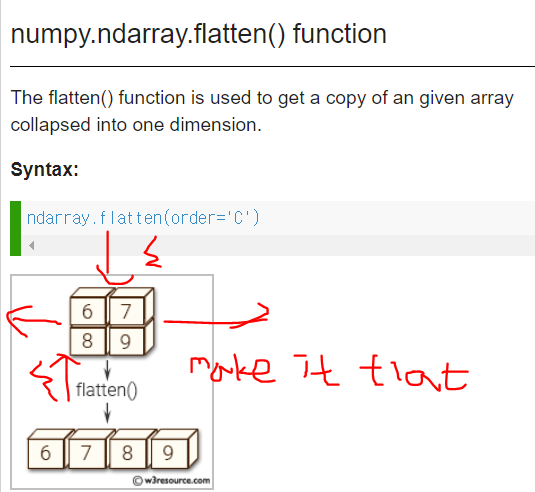

In [57]:
im= (np.array(im)/255).flatten()  # 1줄에 현재 4만개(200*200)개의 정보가 들어있음
im.astype("float32")

array([0.00161476, 0.00159938, 0.00164552, ..., 0.00286044, 0.00286044,
       0.00284506], dtype=float32)